In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
#Importing dataframe

df = pd.read_csv("time.csv.gz")
df1 = df[["YEAR","AGE","SEX","CIVSTAT","EDUC","ETHNIC","HISP","DISAB","HHTYPE","NADULT","UNDER5","EMPSTAT","INCOMEQT","EMPSP","ACT_CHCARE","ACT_CIVIC","ACT_EDUCA","ACT_INHOME","ACT_MEDIA","ACT_MISSING","ACT_OUTHOME","ACT_PCARE","ACT_PHYSICAL","ACT_TRAVEL","ACT_UNDOM","ACT_WORK"]]
df1

,YEAR,AGE,SEX,CIVSTAT,EDUC,ETHNIC,HISP,DISAB,HHTYPE,NADULT,UNDER5,EMPSTAT,INCOMEQT,EMPSP,ACT_CHCARE,ACT_CIVIC,ACT_EDUCA,ACT_INHOME,ACT_MEDIA,ACT_MISSING,ACT_OUTHOME,ACT_PCARE,ACT_PHYSICAL,ACT_TRAVEL,ACT_UNDOM,ACT_WORK
0,2003,36,2,1,5,1,0,0,1,2,1,2,3,1,23,12,0,155,111,0,0,582,0,118,79,360
1,2003,81,2,3,1,1,0,0,7,1,0,3,1,-7,0,180,0,35,235,0,115,555,55,75,190,0
2,2003,40,2,2,5,4,0,0,3,1,0,1,-8,-7,15,0,120,360,0,0,0,705,0,240,0,0
3,2003,32,1,1,4,1,1,0,1,2,2,2,2,4,685,0,0,0,165,0,0,450,80,40,20,0
4,2003,52,2,1,5,1,0,0,2,3,0,2,4,2,0,0,0,178,0,0,290,450,180,92,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30308,2018,69,2,1,3,1,0,0,2,3,0,3,3,4,0,60,0,120,245,0,0,634,77,0,304,0
30309,2018,32,1,4,5,1,1,0,5,3,0,1,3,-7,0,0,0,40,65,40,0,590,0,165,70,470
30310,2018,17,1,2,2,3,0,0,8,4,0,3,4,-7,0,30,0,135,180,0,30,895,0,125,45,0
30311,2018,58,2,4,6,1,0,0,7,1,0,3,3,-7,0,625,0,0,30,0,0,665,0,0,120,0


In [5]:
def is_missing(x):
    if x != 0:
        return False;
    else:
        return True;

missing_filter = df1["ACT_MISSING"].apply(is_missing)
#missing_filter

In [7]:
df2 = df1[missing_filter]
time = df2[["YEAR","AGE","SEX","CIVSTAT","EDUC","ETHNIC","HISP","DISAB","HHTYPE","EMPSTAT","INCOMEQT","ACT_CHCARE","ACT_CIVIC","ACT_EDUCA","ACT_INHOME","ACT_MEDIA","ACT_OUTHOME","ACT_PCARE","ACT_PHYSICAL","ACT_TRAVEL","ACT_UNDOM","ACT_WORK"]]
time

,YEAR,AGE,SEX,CIVSTAT,EDUC,ETHNIC,HISP,DISAB,HHTYPE,EMPSTAT,INCOMEQT,ACT_CHCARE,ACT_CIVIC,ACT_EDUCA,ACT_INHOME,ACT_MEDIA,ACT_OUTHOME,ACT_PCARE,ACT_PHYSICAL,ACT_TRAVEL,ACT_UNDOM,ACT_WORK
0,2003,36,2,1,5,1,0,0,1,2,3,23,12,0,155,111,0,582,0,118,79,360
1,2003,81,2,3,1,1,0,0,7,3,1,0,180,0,35,235,115,555,55,75,190,0
2,2003,40,2,2,5,4,0,0,3,1,-8,15,0,120,360,0,0,705,0,240,0,0
3,2003,32,1,1,4,1,1,0,1,2,2,685,0,0,0,165,0,450,80,40,20,0
4,2003,52,2,1,5,1,0,0,2,2,4,0,0,0,178,0,290,450,180,92,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30306,2018,26,1,4,4,1,0,0,5,3,2,0,0,0,395,300,0,525,10,150,60,0
30308,2018,69,2,1,3,1,0,0,2,3,3,0,60,0,120,245,0,634,77,0,304,0
30310,2018,17,1,2,2,3,0,0,8,3,4,0,30,0,135,180,30,895,0,125,45,0
30311,2018,58,2,4,6,1,0,0,7,3,3,0,625,0,0,30,0,665,0,0,120,0


In [9]:
time.describe()

,YEAR,AGE,SEX,CIVSTAT,EDUC,ETHNIC,HISP,DISAB,HHTYPE,EMPSTAT,INCOMEQT,ACT_CHCARE,ACT_CIVIC,ACT_EDUCA,ACT_INHOME,ACT_MEDIA,ACT_OUTHOME,ACT_PCARE,ACT_PHYSICAL,ACT_TRAVEL,ACT_UNDOM,ACT_WORK
count,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.000000,28157.00000,28157.000000
mean,2007.562276,46.768441,1.553788,1.973577,3.889477,1.255354,0.121107,0.044678,3.341478,1.846433,1.671911,29.570622,35.309799,15.748659,76.355791,213.861384,32.518344,628.431864,36.597969,75.382321,132.31090,163.912349
std,6.900831,17.558158,0.497107,1.240797,1.367510,0.628784,0.326257,0.206600,2.511274,0.918971,3.077024,77.718169,88.722517,80.375723,123.262234,192.754210,76.803970,148.291265,82.405942,81.995183,144.25484,243.491102
min,2003.000000,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2003.000000,33.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,540.000000,0.000000,21.000000,15.00000,0.000000
50%,2003.000000,45.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,20.000000,170.000000,0.000000,619.000000,0.000000,60.000000,85.00000,0.000000
75%,2018.000000,60.000000,2.000000,3.000000,5.000000,1.000000,0.000000,0.000000,6.000000,3.000000,3.000000,1.000000,15.000000,0.000000,110.000000,307.000000,30.000000,705.000000,31.000000,101.000000,204.00000,405.000000
max,2018.000000,81.000000,2.000000,4.000000,6.000000,5.000000,1.000000,1.000000,8.000000,3.000000,4.000000,1151.000000,1280.000000,1288.000000,1370.000000,1410.000000,870.000000,1440.000000,899.000000,1170.000000,1280.00000,1420.000000


In [11]:
#Mapping categorical variables

sex_map = {1:"Male", 2:"Female"}
time["SEX"] = time["SEX"].map(sex_map)

maritalstatus_map = {1:"Married", 2:"Separated or divorced", 3:"Widowed", 4:"Never married"}
time["CIVSTAT"] = time["CIVSTAT"].map(maritalstatus_map)

education_map = {1:"0-8th grade", 2:"9-11th grade", 3: "High school graduate", 4:"Some college", 5:"College graduate", 6:"Post graduate"}
time["EDUC"] = time["EDUC"].map(education_map)

ethnicity_map = {1:"White", 2:"Black", 3:"Asian", 4:"Some other race", 5:"Hispanic"}
time["ETHNIC"] = time["ETHNIC"].map(ethnicity_map)

household_map = {1:"Married with child", 2:"Married with no child", 3:"Female HH with child", 4:"Female HH with no child", 5:"Male HH", 6:"Single male", 7:"Single female", 8:"Other"}
time["HHTYPE"] = time["HHTYPE"].map(household_map)

employment_map = {1:"Full-time", 2:"Part-time", 3:"Not employed"}
time["EMPSTAT"] = time["EMPSTAT"].map(employment_map)

income_map = {1:"Lowest quartile", 2:"Second lowest quartile", 3:"Second highest quartile", 4:"Highest quartile"}
time["INCOMEQT"] = time["INCOMEQT"].map(income_map)

time

/tmp/ipykernel_172/3808543041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time["SEX"] = time["SEX"].map(sex_map)
/tmp/ipykernel_172/3808543041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time["CIVSTAT"] = time["CIVSTAT"].map(maritalstatus_map)
/tmp/ipykernel_172/3808543041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,YEAR,AGE,SEX,CIVSTAT,EDUC,ETHNIC,HISP,DISAB,HHTYPE,EMPSTAT,INCOMEQT,ACT_CHCARE,ACT_CIVIC,ACT_EDUCA,ACT_INHOME,ACT_MEDIA,ACT_OUTHOME,ACT_PCARE,ACT_PHYSICAL,ACT_TRAVEL,ACT_UNDOM,ACT_WORK
0,2003,36,Female,Married,College graduate,White,0,0,Married with child,Part-time,Second highest quartile,23,12,0,155,111,0,582,0,118,79,360
1,2003,81,Female,Widowed,0-8th grade,White,0,0,Single female,Not employed,Lowest quartile,0,180,0,35,235,115,555,55,75,190,0
2,2003,40,Female,Separated or divorced,College graduate,Some other race,0,0,Female HH with child,Full-time,NaN,15,0,120,360,0,0,705,0,240,0,0
3,2003,32,Male,Married,Some college,White,1,0,Married with child,Part-time,Second lowest quartile,685,0,0,0,165,0,450,80,40,20,0
4,2003,52,Female,Married,College graduate,White,0,0,Married with no child,Part-time,Highest quartile,0,0,0,178,0,290,450,180,92,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30306,2018,26,Male,Never married,Some college,White,0,0,Male HH,Not employed,Second lowest quartile,0,0,0,395,300,0,525,10,150,60,0
30308,2018,69,Female,Married,High school graduate,White,0,0,Married with no child,Not employed,Second highest quartile,0,60,0,120,245,0,634,77,0,304,0
30310,2018,17,Male,Separated or divorced,9-11th grade,Asian,0,0,Other,Not employed,Highest quartile,0,30,0,135,180,30,895,0,125,45,0
30311,2018,58,Female,Never married,Post graduate,White,0,0,Single female,Not employed,Second highest quartile,0,625,0,0,30,0,665,0,0,120,0


In [13]:
#dropping rows with missing data:

time.drop_duplicates()

missing_rows = time["INCOMEQT"].isna()
time = time[~ missing_rows]

time

,YEAR,AGE,SEX,CIVSTAT,EDUC,ETHNIC,HISP,DISAB,HHTYPE,EMPSTAT,INCOMEQT,ACT_CHCARE,ACT_CIVIC,ACT_EDUCA,ACT_INHOME,ACT_MEDIA,ACT_OUTHOME,ACT_PCARE,ACT_PHYSICAL,ACT_TRAVEL,ACT_UNDOM,ACT_WORK
0,2003,36,Female,Married,College graduate,White,0,0,Married with child,Part-time,Second highest quartile,23,12,0,155,111,0,582,0,118,79,360
1,2003,81,Female,Widowed,0-8th grade,White,0,0,Single female,Not employed,Lowest quartile,0,180,0,35,235,115,555,55,75,190,0
3,2003,32,Male,Married,Some college,White,1,0,Married with child,Part-time,Second lowest quartile,685,0,0,0,165,0,450,80,40,20,0
4,2003,52,Female,Married,College graduate,White,0,0,Married with no child,Part-time,Highest quartile,0,0,0,178,0,290,450,180,92,250,0
5,2003,46,Female,Married,College graduate,White,0,0,Married with no child,Full-time,Second highest quartile,0,60,0,60,335,60,490,60,60,255,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30306,2018,26,Male,Never married,Some college,White,0,0,Male HH,Not employed,Second lowest quartile,0,0,0,395,300,0,525,10,150,60,0
30308,2018,69,Female,Married,High school graduate,White,0,0,Married with no child,Not employed,Second highest quartile,0,60,0,120,245,0,634,77,0,304,0
30310,2018,17,Male,Separated or divorced,9-11th grade,Asian,0,0,Other,Not employed,Highest quartile,0,30,0,135,180,30,895,0,125,45,0
30311,2018,58,Female,Never married,Post graduate,White,0,0,Single female,Not employed,Second highest quartile,0,625,0,0,30,0,665,0,0,120,0


In [15]:
#Resetting index

time = time.reset_index(drop = True)

Text(0, 0.5, 'Frequency')

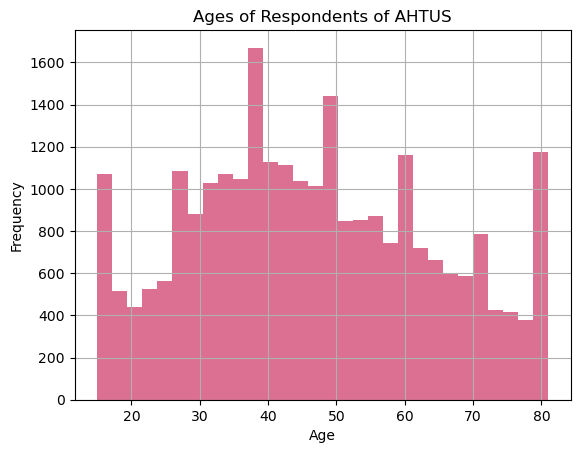

In [45]:
time["AGE"].hist(bins=30, color = "palevioletred")
plt.title("Ages of Respondents of AHTUS")
plt.xlabel("Age")
plt.ylabel("Frequency")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

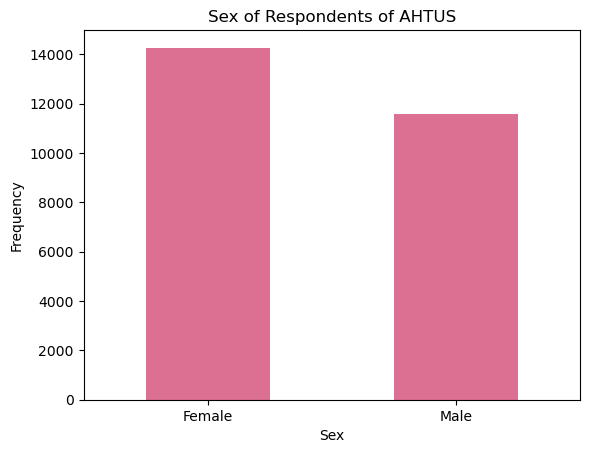

In [47]:
sex_counts = time["SEX"].value_counts()
#sex_counts
sex_counts.plot(kind = "bar", color = "palevioletred")
plt.title("Sex of Respondents of AHTUS")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Full-time'),
  Text(1, 0, 'Not employed'),
  Text(2, 0, 'Part-time')])

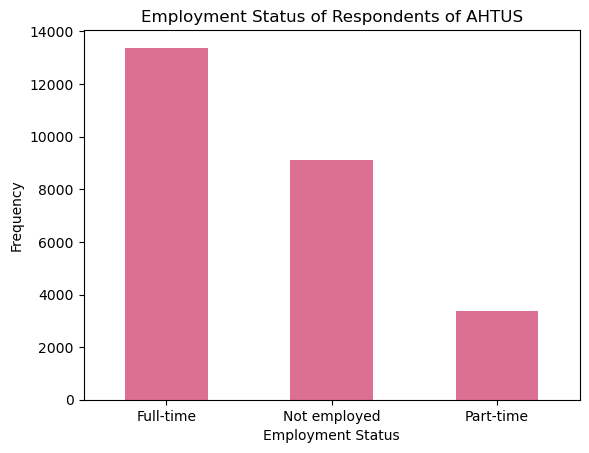

In [79]:
employment_counts = time["EMPSTAT"].value_counts()
#employment_counts
employment_counts.plot(kind = "bar", color = "palevioletred")
plt.title("Employment Status of Respondents of AHTUS")
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'College graduate'),
  Text(1, 0, 'High school graduate'),
  Text(2, 0, 'Some college'),
  Text(3, 0, 'Post graduate'),
  Text(4, 0, '9-11th grade'),
  Text(5, 0, '0-8th grade')])

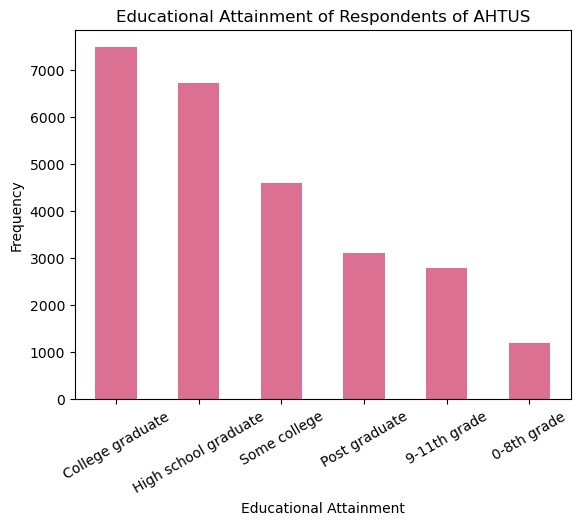

In [83]:
education_counts = time["EDUC"].value_counts()
#education_counts
education_counts.plot(kind = "bar", color = "palevioletred")
plt.title("Educational Attainment of Respondents of AHTUS")
plt.xlabel("Educational Attainment")
plt.ylabel("Frequency")
plt.xticks(rotation=30)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(44.995444444444445, 0.5, 'Time Spent on Paid Work (Minutes)')

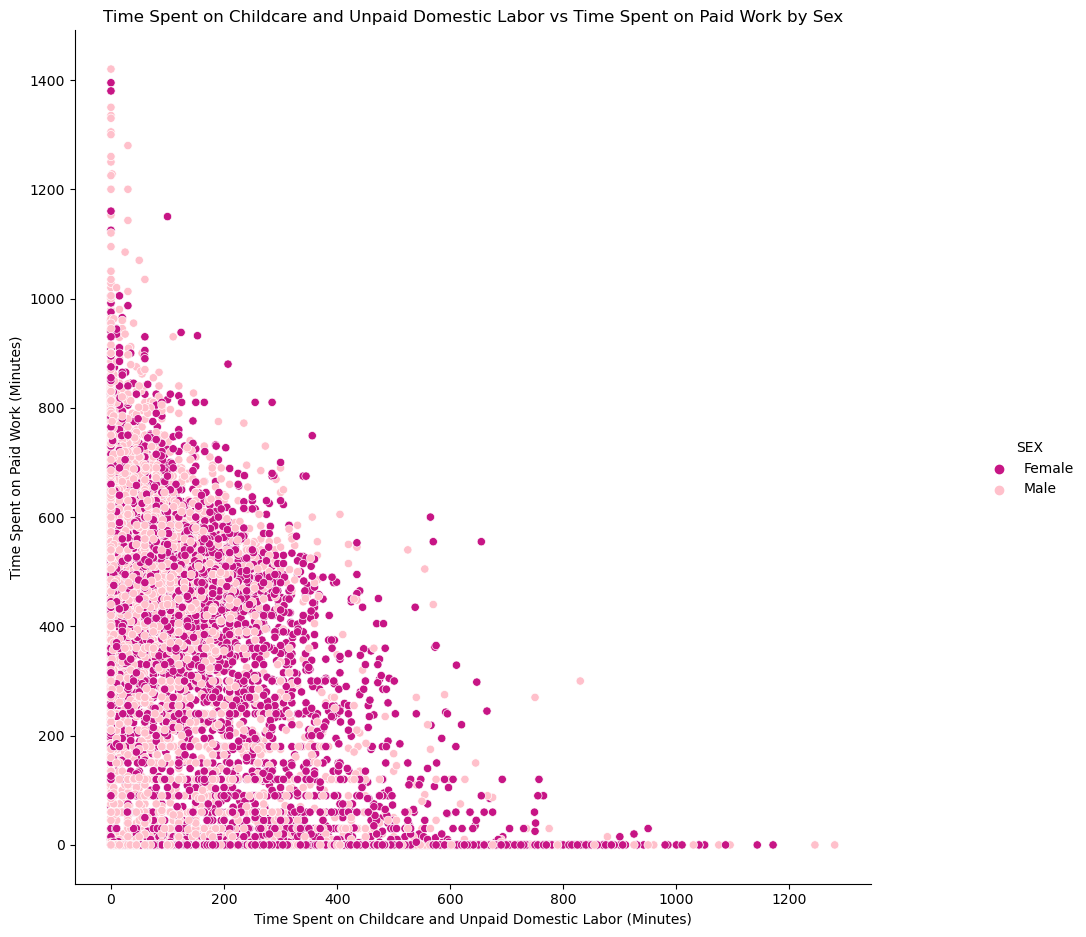

In [17]:
time["DOM_CHCARE"] = time["ACT_UNDOM"] + time["ACT_CHCARE"]

palette1 = {"mediumvioletred", "pink"}

a = sns.relplot( x = "DOM_CHCARE", y = "ACT_WORK", hue = "SEX", palette = palette1, data = time)
a.fig.set_size_inches(12,10)
plt.title("Time Spent on Childcare and Unpaid Domestic Labor vs Time Spent on Paid Work by Sex")
plt.xlabel("Time Spent on Childcare and Unpaid Domestic Labor (Minutes)")
plt.ylabel("Time Spent on Paid Work (Minutes)")

In [53]:
time.groupby("SEX").describe()

YEAR                                                         \
          count         mean       std     min     25%     50%     75%   
SEX                                                                      
Female  14273.0  2007.873187  7.025191  2003.0  2003.0  2003.0  2018.0   
Male    11590.0  2008.082399  7.099969  2003.0  2003.0  2003.0  2018.0   

                    AGE                                                      \
           max    count       mean        std   min   25%   50%   75%   max   
SEX                                                                           
Female  2018.0  14273.0  47.025783  17.746428  15.0  33.0  45.0  60.0  81.0   
Male    2018.0  11590.0  45.897670  17.101365  15.0  33.0  45.0  59.0  81.0   

           HISP                                                 DISAB  \
          count      mean       std  min  25%  50%  75%  max    count   
SEX                                                                     
Female  14273.0  0.118966  0.323760  0.0  0.0  0.0  0.0  1.0  14273.0   
Male    11590.0  0.130544  0.336915  0.0  0.0  0.0  0.0  1.0  11590.0   

                                                    ACT_CHCARE             \
            mean       std  min  25%  50%  75%  max      count       mean   
SEX                                                                         
Female  0.047012  0.211672  0.0  0.0  0.0  0.0  1.0    14273.0  38.981994   
Male    0.042709  0.202209  0.0  0.0  0.0  0.0  1.0    11590.0  19.347886   

                                               ACT_CIVIC             \
              std  min  25%  50%   75%     max     count       mean   
SEX                                                                   
Female  89.473613  0.0  0.0  0.0  30.0  1151.0   14273.0  37.539480   
Male    60.366169  0.0  0.0  0.0   0.0   844.0   11590.0  31.632528   

                                               ACT_EDUCA             \
              std  min  25%  50%   75%     max     count       mean   
SEX                                                                   
Female  88.437056  0.0  0.0  0.0  22.0  1129.0   14273.0  16.097877   
Male    87.330080  0.0  0.0  0.0   5.0  1095.0   11590.0  15.652200   

                                              ACT_INHOME             \
              std  min  25%  50%  75%     max      count       mean   
SEX                                                                   
Female  80.119447  0.0  0.0  0.0  0.0  1084.0    14273.0  75.303440   
Male    81.561657  0.0  0.0  0.0  0.0  1288.0    11590.0  76.898361   

                                                  ACT_MEDIA              \
               std  min  25%   50%    75%     max     count        mean   
SEX                                                                       
Female  119.037683  0.0  0.0  25.0  110.0  1370.0   14273.0  202.788902   
Male    127.616356  0.0  0.0  15.0  110.0  1073.0   11590.0  226.635462   

                                                    ACT_OUTHOME             \
               std  min   25%    50%    75%     max       count       mean   
SEX                                                                          
Female  182.611025  0.0  60.0  160.0  295.0  1315.0     14273.0  32.576333   
Male    203.858112  0.0  71.0  180.0  330.0  1410.0     11590.0  32.796376   

                                              ACT_PCARE              \
              std  min  25%  50%   75%    max     count        mean   
SEX                                                                   
Female  76.450072  0.0  0.0  0.0  30.0  855.0   14273.0  639.483360   
Male    77.790496  0.0  0.0  0.0  30.0  870.0   11590.0  613.623641   

                                                     ACT_PHYSICAL             \
               std  min    25%    50%    75%     max        count       mean   
SEX                                                                            
Female  145.545031  0.0  550.0  630.0  720.0  1440.0      142

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Second highest quartile'),
  Text(1, 0, 'Lowest quartile'),
  Text(2, 0, 'Second lowest quartile'),
  Text(3, 0, 'Highest quartile')])

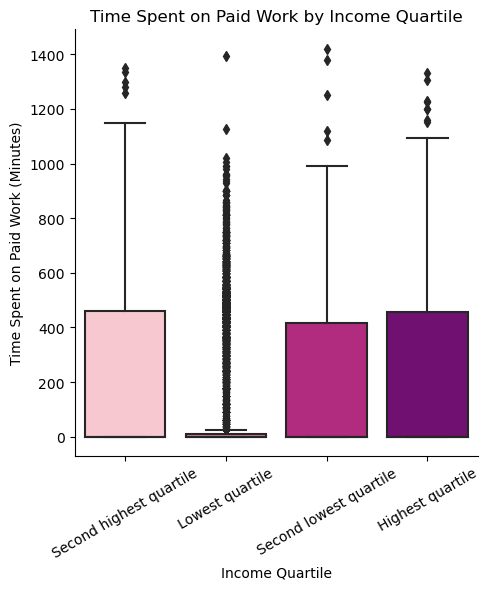

In [55]:
palette2 = {"pink","mediumvioletred","purple", "palevioletred"}

sns.catplot(x = "INCOMEQT", y = "ACT_WORK", kind = "box", palette = palette2, data = time)
plt.title("Time Spent on Paid Work by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("Time Spent on Paid Work (Minutes)")
plt.xticks(rotation=30)

In [97]:
time.groupby("INCOMEQT").describe()

YEAR                                         \
                          count         mean       std     min     25%   
INCOMEQT                                                                 
Highest quartile         6646.0  2007.954108  7.055205  2003.0  2003.0   
Lowest quartile          6610.0  2007.865356  7.022543  2003.0  2003.0   
Second highest quartile  7020.0  2007.136752  6.704101  2003.0  2003.0   
Second lowest quartile   5587.0  2009.145516  7.377338  2003.0  2003.0   

                                                    AGE                        \
                            50%     75%     max   count       mean        std   
INCOMEQT                                                                        
Highest quartile         2003.0  2018.0  2018.0  6646.0  43.920403  14.469619   
Lowest quartile          2003.0  2018.0  2018.0  6610.0  50.727837  19.952271   
Second highest quartile  2003.0  2018.0  2018.0  7020.0  44.073647  15.910299   
Second lowest quartile   2003.0  2018.0  2018.0  5587.0  47.708967  18.351751   

                                                         HISP            \
                          min   25%   50%   75%   max   count      mean   
INCOMEQT                                                                  
Highest quartile         15.0  35.0  44.0  54.0  81.0  6646.0  0.055372   
Lowest quartile          15.0  33.0  52.0  68.0  81.0  6610.0  0.194402   
Second highest quartile  15.0  32.0  43.0  55.0  81.0  7020.0  0.097721   
Second lowest quartile   15.0  33.0  46.0  63.0  81.0  5587.0  0.156077   

                                                             DISAB            \
                              std  min  25%  50%  75%  max   count      mean   
INCOMEQT                                                                       
Highest quartile         0.228721  0.0  0.0  0.0  0.0  1.0  6646.0  0.007373   
Lowest quartile          0.395770  0.0  0.0  0.0  0.0  1.0  6610.0  0.125416   
Second highest quartile  0.296958  0.0  0.0  0.0  0.0  1.0  7020.0  0.014530   
Second lowest quartile   0.362960  0.0  0.0  0.0  0.0  1.0  5587.0  0.033292   

                                                            NADULT            \
                              std  min  25%  50%  75%  max   count      mean   
INCOMEQT                                                                       
Highest quartile         0.085555  0.0  0.0  0.0  0.0  1.0  6646.0  2.223142   
Lowest quartile          0.331215  0.0  0.0  0.0  0.0  1.0  6610.0  1.576702   
Second highest quartile  0.119670  0.0  0.0  0.0  0.0  1.0  7020.0  2.047436   
Second lowest quartile   0.179413  0.0  0.0  0.0  0.0  1.0  5587.0  1.833363   

                                                            UNDER5            \
                              std  min  25%  50%  75%  max   count      mean   
INCOMEQT                                                                       
Highest quartile         0.763155  1.0  2.0  2.0  2.0  9.0  6646.0  0.235179   
Lowest quartile          0.730795  1.0  1.0  1.0  2.0  7.0  6610.0  0.177761   
Second highest quartile  0.768114  1.0  2.0  2.0  2.0  8.0  7020.0  0.227066   
Second lowest quartile   0.777625  1.0  1.0  2.0  2.0  6.0  5587.0  0.196528   

                                                           ACT_CHCARE  \
                              std  min  25%  50%  75%  max      count   
INCOMEQT                                                                
Highest quartile         0.546611  0.0  0.0  0.0  0.0  5.0     6646.0   
Lowest quartile          0.489275  0.0  0.0  0.0  0.0  4.0     6610.0   
Second highest quartile  0.528172  0.0  0.0  0.0  0.0  3.0     7020.0   
Second lowest quartile   0.508470  0.0  0.0  0.0  0.0  3.0     5587.0   

                                                                            \
                              mean        std  min  25%  50%   75%     max   
INCOMEQT                                                       

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, '2003'), Text(1, 0, '2018')])

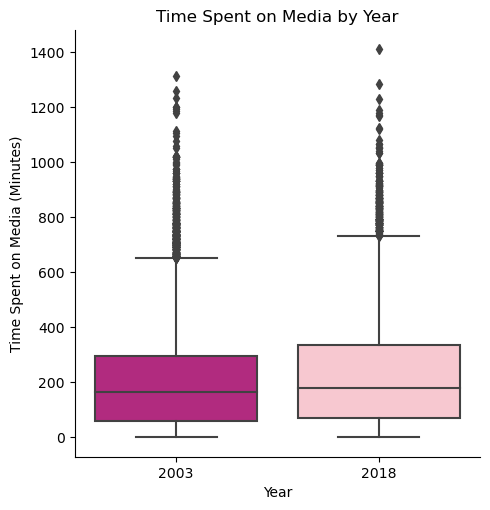

In [35]:
sns.catplot(x = "YEAR", y = "ACT_MEDIA", kind = "box", palette = palette1, data = time)
plt.title("Time Spent on Media by Year")
plt.xlabel("Year")
plt.ylabel("Time Spent on Media (Minutes)")
plt.xticks(rotation=0)

In [99]:
time.groupby("YEAR").describe()

AGE                                                         HISP  \
        count       mean        std   min   25%   50%   75%   max    count   
YEAR                                                                         
2003  17299.0  44.773397  17.009107  15.0  32.0  43.0  56.0  81.0  17299.0   
2018   8564.0  50.048809  17.849749  15.0  36.0  50.0  65.0  81.0   8564.0   

                                                     DISAB            \
          mean       std  min  25%  50%  75%  max    count      mean   
YEAR                                                                   
2003  0.116018  0.320256  0.0  0.0  0.0  0.0  1.0  17299.0  0.040291   
2018  0.140589  0.347617  0.0  0.0  0.0  0.0  1.0   8564.0  0.054764   

                                          NADULT                           \
           std  min  25%  50%  75%  max    count      mean       std  min   
YEAR                                                                        
2003  0.196647  0.0  0.0  0.0  0.0  1.0  17299.0  1.951327  0.785940  1.0   
2018  0.227533  0.0  0.0  0.0  0.0  1.0   8564.0  1.874942  0.819095  1.0   

                           UNDER5                                          \
      25%  50%  75%  max    count      mean       std  min  25%  50%  75%   
YEAR                                                                        
2003  1.0  2.0  2.0  8.0  17299.0  0.228857  0.541222  0.0  0.0  0.0  0.0   
2018  1.0  2.0  2.0  9.0   8564.0  0.171766  0.470840  0.0  0.0  0.0  0.0   

          ACT_CHCARE                                                     \
      max      count       mean        std  min  25%  50%   75%     max   
YEAR                                                                      
2003  5.0    17299.0  31.800798  79.533386  0.0  0.0  0.0  10.0  1151.0   
2018  4.0     8564.0  26.916161  75.950571  0.0  0.0  0.0   0.0   844.0   

     ACT_CIVIC                                                    ACT_EDUCA  \
         count       mean        std  min  25%  50%   75%     max     count   
YEAR                                                                          
2003   17299.0  35.516908  88.903798  0.0  0.0  0.0  15.0  1129.0   17299.0   
2018    8564.0  33.630897  86.106105  0.0  0.0  0.0  10.0  1020.0    8564.0   

                                                       ACT_INHOME             \
           mean        std  min  25%  50%  75%     max      count       mean   
YEAR                                                                           
2003  17.193768  83.834002  0.0  0.0  0.0  0.0  1084.0    17299.0  75.241054   
2018  13.281060  74.123889  0.0  0.0  0.0  0.0  1288.0     8564.0  77.587926   

                                                ACT_MEDIA              \
             std  min  25%   50%    75%     max     count        mean   
YEAR                                                                    
2003  119.149472  0.0  0.0  20.0  110.0  1370.0   17299.0  204.659691   
2018  130.300050  0.0  0.0  15.0  110.0  1073.0    8564.0  231.282461   

                                                  ACT_OUTHOME             \
             std  min   25%    50%    75%     max       count       mean   
YEAR                                                                       
2003  183.621842  0.0  60.0  164.0  296.0  1315.0     17299.0  34.990867   
2018  208.956134  0.0  70.0  180.0  335.0  1410.0      8564.0  27.996847   

                                            ACT_PCARE                          \
            std  min  25%  50%   75%    max     count        mean         std   
YEAR                                                                            
2003  80.182229  0.0  0.0  0.0  30.0  860.0   17299.0  623.147523  145.594273   
2018  70.077392  0.0  0.0  0.0  15.0  870.0    8564.0  637.484236  151.277411   

                                        ACT_PHYSICAL                        \
       min    25%    50%    75%     max        count       mean        std   
YEAR

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

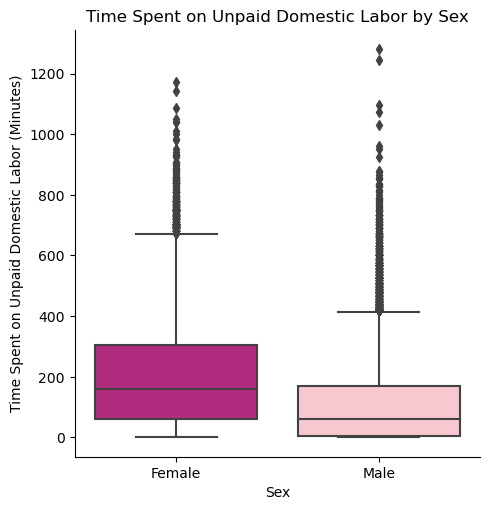

In [40]:
sns.catplot(x = "SEX", y = "DOM_CHCARE", kind = "box", palette = palette1, data = time)
plt.title("Time Spent on Unpaid Domestic Labor by Sex")
plt.xlabel("Sex")
plt.ylabel("Time Spent on Unpaid Domestic Labor (Minutes)")
plt.xticks(rotation=0)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

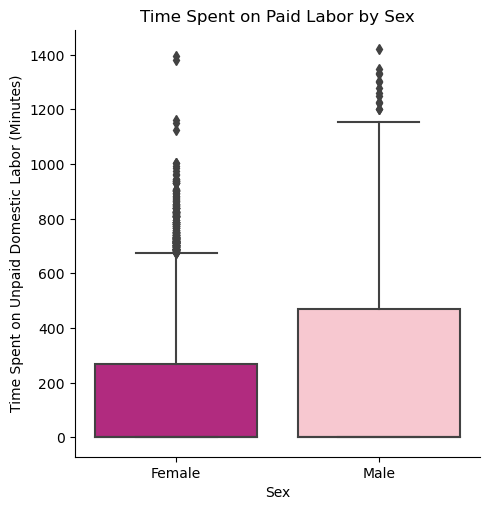

In [43]:
sns.catplot(x = "SEX", y = "ACT_WORK", kind = "box", palette = palette1, data = time)
plt.title("Time Spent on Paid Labor by Sex")
plt.xlabel("Sex")
plt.ylabel("Time Spent on Unpaid Domestic Labor (Minutes)")
plt.xticks(rotation=0)

In [19]:
x = time[["YEAR","AGE","CIVSTAT","EDUC","ETHNIC","HISP","DISAB","HHTYPE","EMPSTAT","INCOMEQT","ACT_WORK","DOM_CHCARE"]]
y = time["SEX"]

x = pd.get_dummies(x, columns = ["YEAR","CIVSTAT","EDUC","ETHNIC","HISP","DISAB","HHTYPE","EMPSTAT","INCOMEQT"], drop_first = True)

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[0.31818182, 0.25352113, 0.0796875 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.1484375 , ..., 1.        , 0.        ,
        0.        ],
       [0.25757576, 0.        , 0.55078125, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.03030303, 0.        , 0.03515625, ..., 0.        , 0.        ,
        0.        ],
       [0.65151515, 0.        , 0.09375   , ..., 0.        , 1.        ,
        0.        ],
       [0.86363636, 0.        , 0.19921875, ..., 0.        , 1.        ,
        0.        ]])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

In [61]:
tree3 = DecisionTreeClassifier(max_depth = 3)
tree3.fit(x_train,y_train)
y_test_pred = tree3.predict(x_test)
confusion_matrix3 = confusion_matrix(y_test,y_test_pred)
confusion_matrix3

array([[2029,  816],
       [ 678, 1650]])

In [63]:
tree5 = DecisionTreeClassifier(max_depth = 5)
tree5.fit(x_train,y_train)
y_test_pred = tree5.predict(x_test)
confusion_matrix5 = confusion_matrix(y_test,y_test_pred)
confusion_matrix5

array([[2012,  833],
       [ 621, 1707]])

In [65]:
tree6 = DecisionTreeClassifier(max_depth = 6)
tree6.fit(x_train,y_train)
y_test_pred = tree6.predict(x_test)
confusion_matrix6 = confusion_matrix(y_test,y_test_pred)
confusion_matrix6

array([[2088,  757],
       [ 630, 1698]])

In [67]:
tree7 = DecisionTreeClassifier(max_depth = 7)
tree7.fit(x_train,y_train)
y_test_pred = tree7.predict(x_test)
confusion_matrix7 = confusion_matrix(y_test,y_test_pred)
confusion_matrix7

array([[2229,  616],
       [ 708, 1620]])

In [69]:
#The best two models seem to be the last 2 (mx_depth 6 and 7 respectively)
#Let's check their accuracy
#For tree6
true_neg6 = confusion_matrix6[0][0]
false_neg6 = confusion_matrix6[1][0]
false_pos6 = confusion_matrix6[0][1]
true_pos6 = confusion_matrix6[1][1]

accuracy6 = (true_pos6 + true_neg6)/len(x_test)
accuracy6

0.7318770539338875

In [73]:
#For tree7
true_neg7 = confusion_matrix7[0][0]
false_neg7 = confusion_matrix7[1][0]
false_pos7 = confusion_matrix7[0][1]
true_pos7 = confusion_matrix7[1][1]

accuracy7 = (true_pos7 + true_neg7)/len(x_test)
accuracy7

0.7440556736903151

In [122]:
#Tree with max depth 7 is more accurate.

[Text(0.7387152777777778, 0.9375, 'x[24] <= 0.5\ngini = 0.495\nsamples = 20690\nvalue = [11390, 9300]'),
 Text(0.6024305555555556, 0.8125, 'x[23] <= 0.5\ngini = 0.478\nsamples = 18800\nvalue = [11387, 7413]'),
 Text(0.3993055555555556, 0.6875, 'x[2] <= 0.073\ngini = 0.497\nsamples = 16159\nvalue = [8749, 7410]'),
 Text(0.2048611111111111, 0.5625, 'x[19] <= 0.5\ngini = 0.472\nsamples = 7023\nvalue = [2683, 4340]'),
 Text(0.1111111111111111, 0.4375, 'x[5] <= 0.5\ngini = 0.482\nsamples = 6495\nvalue = [2628, 3867]'),
 Text(0.05555555555555555, 0.3125, 'x[4] <= 0.5\ngini = 0.471\nsamples = 6169\nvalue = [2346, 3823]'),
 Text(0.027777777777777776, 0.1875, 'x[2] <= 0.004\ngini = 0.444\nsamples = 4625\nvalue = [1536, 3089]'),
 Text(0.013888888888888888, 0.0625, 'gini = 0.341\nsamples = 1673\nvalue = [365, 1308]'),
 Text(0.041666666666666664, 0.0625, 'gini = 0.479\nsamples = 2952\nvalue = [1171, 1781]'),
 Text(0.08333333333333333, 0.1875, 'x[2] <= 0.014\ngini = 0.499\nsamples = 1544\nvalue = [

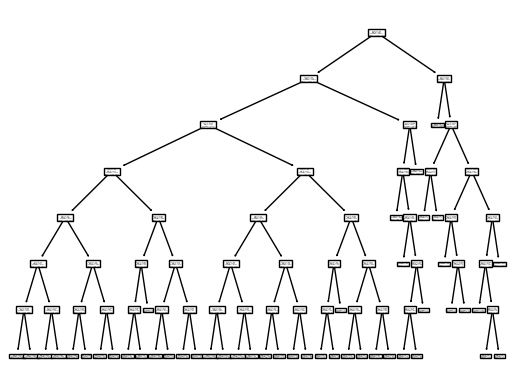

In [75]:
from sklearn.tree import plot_tree
plot_tree(tree7)

In [79]:
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 100)
rf.fit(x_train, y_train)
y_test_preds_rf = rf.predict(x_test)
confusion_matrix_rf = confusion_matrix(y_test,y_test_preds_rf)
confusion_matrix_rf

array([[2255,  590],
       [ 602, 1726]])

In [81]:
true_neg_rf = confusion_matrix_rf[0][0]
false_neg_rf = confusion_matrix_rf[1][0]
false_pos_rf = confusion_matrix_rf[0][1]
true_pos_rf = confusion_matrix_rf[1][1]

accuracy_rf = (true_pos_rf + true_neg_rf)/len(x_test)
accuracy_rf

0.7695727817514015

In [83]:
rf = RandomForestClassifier(n_estimators = 2000, max_depth = 100)
rf.fit(x_train, y_train)
y_test_preds_rf = rf.predict(x_test)
confusion_matrix_rf = confusion_matrix(y_test,y_test_preds_rf)
confusion_matrix_rf

array([[2258,  587],
       [ 599, 1729]])

In [85]:
true_neg_rf = confusion_matrix_rf[0][0]
false_neg_rf = confusion_matrix_rf[1][0]
false_pos_rf = confusion_matrix_rf[0][1]
true_pos_rf = confusion_matrix_rf[1][1]

accuracy_rf = (true_pos_rf + true_neg_rf)/len(x_test)
accuracy_rf

0.7707326502996327

In [23]:
full_time_workers = time[time["EMPSTAT"]=="Full-time"]
full_time_workers

,YEAR,AGE,SEX,CIVSTAT,EDUC,ETHNIC,HISP,DISAB,HHTYPE,EMPSTAT,INCOMEQT,ACT_CHCARE,ACT_CIVIC,ACT_EDUCA,ACT_INHOME,ACT_MEDIA,ACT_OUTHOME,ACT_PCARE,ACT_PHYSICAL,ACT_TRAVEL,ACT_UNDOM,ACT_WORK,DOM_CHCARE
4,2003,46,Female,Married,College graduate,White,0,0,Married with no child,Full-time,Second highest quartile,0,60,0,60,335,60,490,60,60,255,60,255
5,2003,37,Female,Separated or divorced,Post graduate,White,0,0,Female HH with child,Full-time,Second highest quartile,80,0,0,50,120,235,600,55,160,140,0,220
6,2003,37,Male,Never married,High school graduate,White,0,0,Single male,Full-time,Highest quartile,0,0,0,0,330,0,595,210,80,225,0,225
7,2003,42,Male,Married,Some college,Asian,0,0,Married with child,Full-time,Highest quartile,0,0,0,450,60,0,690,60,60,120,0,120
9,2003,28,Male,Married,College graduate,White,0,0,Married with child,Full-time,Highest quartile,0,0,0,0,326,280,620,0,94,120,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25851,2018,52,Male,Never married,Some college,White,0,0,Single male,Full-time,Lowest quartile,0,0,0,0,0,0,1140,0,165,120,15,120
25854,2018,34,Female,Married,College graduate,White,0,0,Married with child,Full-time,Highest quartile,45,0,0,90,45,45,523,0,34,0,658,45
25855,2018,52,Female,Married,Post graduate,White,0,0,Married with no child,Full-time,Highest quartile,0,124,0,10,401,0,590,25,110,180,0,180
25856,2018,50,Male,Married,Post graduate,White,0,0,Married with child,Full-time,Highest quartile,0,0,0,45,90,90,750,15,45,405,0,405


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

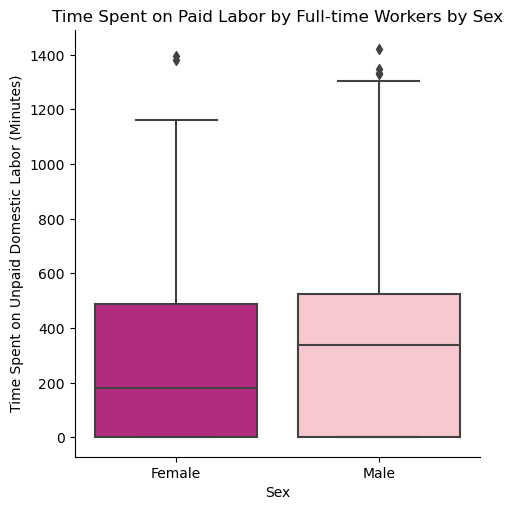

In [27]:
sns.catplot(x = "SEX", y = "ACT_WORK", kind = "box", palette = palette1, data = full_time_workers)
plt.title("Time Spent on Paid Labor by Full-time Workers by Sex")
plt.xlabel("Sex")
plt.ylabel("Time Spent on Unpaid Domestic Labor (Minutes)")
plt.xticks(rotation=0)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

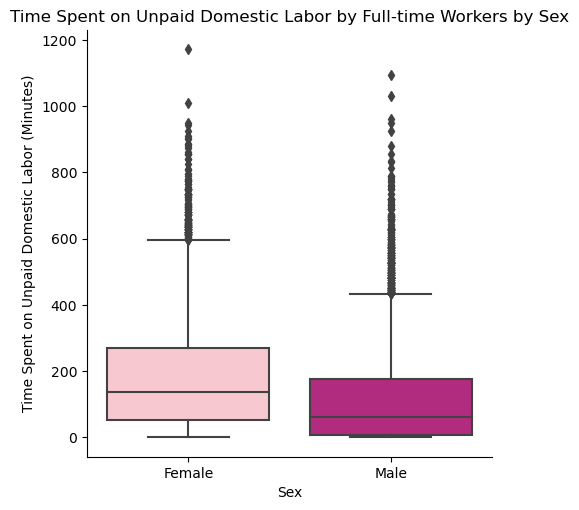

In [91]:
sns.catplot(x = "SEX", y = "DOM_CHCARE", kind = "box", palette = palette1, data = full_time_workers)
plt.title("Time Spent on Unpaid Domestic Labor by Full-time Workers by Sex")
plt.xlabel("Sex")
plt.ylabel("Time Spent on Unpaid Domestic Labor (Minutes)")
plt.xticks(rotation=0)

In [31]:
full_time_workers.groupby("SEX").describe()

YEAR                                                                 \
         count         mean       std     min     25%     50%     75%     max   
SEX                                                                             
Female  6114.0  2007.874877  7.026152  2003.0  2003.0  2003.0  2018.0  2018.0   
Male    7268.0  2007.732389  6.971156  2003.0  2003.0  2003.0  2018.0  2018.0   

           AGE                                                        HISP  \
         count       mean        std   min   25%   50%   75%   max   count   
SEX                                                                          
Female  6114.0  42.342002  11.906610  15.0  33.0  42.0  51.0  81.0  6114.0   
Male    7268.0  42.433269  11.834384  16.0  33.0  42.0  51.0  81.0  7268.0   

                                                      DISAB                 \
            mean       std  min  25%  50%  75%  max   count mean  std  min   
SEX                                                                          
Female  0.109912  0.312805  0.0  0.0  0.0  0.0  1.0  6114.0  0.0  0.0  0.0   
Male    0.137589  0.344492  0.0  0.0  0.0  0.0  1.0  7268.0  0.0  0.0  0.0   

                           ACT_CHCARE                                       \
        25%  50%  75%  max      count       mean        std  min  25%  50%   
SEX                                                                          
Female  0.0  0.0  0.0  0.0     6114.0  35.300785  79.567194  0.0  0.0  0.0   
Male    0.0  0.0  0.0  0.0     7268.0  25.712300  66.732714  0.0  0.0  0.0   

                     ACT_CIVIC                                            \
         75%     max     count       mean        std  min  25%  50%  75%   
SEX                                                                        
Female  30.0  1151.0    6114.0  27.896304  76.230176  0.0  0.0  0.0  6.0   
Male     6.0   763.0    7268.0  26.664970  78.202863  0.0  0.0  0.0  1.0   

               ACT_EDUCA                                                  \
           max     count      mean        std  min  25%  50%  75%    max   
SEX                                                                        
Female  1129.0    6114.0  6.016029  44.070090  0.0  0.0  0.0  0.0  825.0   
Male    1095.0    7268.0  3.578151  33.164639  0.0  0.0  0.0  0.0  790.0   

       ACT_INHOME                                                       \
            count       mean         std  min  25%   50%   75%     max   
SEX                                                                      
Female     6114.0  58.094046   98.433267  0.0  0.0  15.0  80.0  1039.0   
Male       7268.0  64.890204  113.881583  0.0  0.0  10.0  87.0  1073.0   

       ACT_MEDIA                                                           \
           count        mean         std  min   25%    50%    75%     max   
SEX                                                                         
Female    6114.0  151.576219  146.642250  0.0  40.0  120.0  215.0  1020.0   
Male      7268.0  174.712851  164.059883  0.0  60.0  135.0  241.0  1040.0   

       ACT_OUTHOME                                                    \
             count       mean        std  min  25%  50%   75%    max   
SEX                                                                    
Female      6114.0  35.026987  78.066392  0.0  0.0  0.0  35.0  855.0   
Male        7268.0  35.127408  81.139981  0.0  0.0  0.0  30.0  870.0   

       ACT_PCARE                                                             \
           count        mean         std   min    25%    50%    75%     max   
SEX                                                                           
Female    6114.0  618.413150  135.689375  30.0  535.0  610.0  690.0  1440.0   
Male      7268.0  593.590259  136.282728   0.0  510.0  585.0  670.0  1440.0   

       ACT_PHYSICAL                                                    \
              count       mean        std  min  25%  50%   75%    max   
SEX      

In [38]:
hypothesis = full_time_workers[["SEX"]]
hypothesis["work"] = full_time_workers["ACT_WORK"] + full_time_workers["DOM_CHCARE"]

hypothesis

/tmp/ipykernel_172/2020835862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis["work"] = full_time_workers["ACT_WORK"] + full_time_workers["DOM_CHCARE"]


,SEX,work
4,Female,315
5,Female,220
6,Male,225
7,Male,120
9,Male,120
...,...,...
25851,Male,135
25854,Female,703
25855,Female,180
25856,Male,405


In [44]:
data_male_mean = hypothesis[hypothesis["SEX"]=="Male"]["work"].mean()
data_male_mean

412.4781232801321

In [46]:
data_female_mean = hypothesis[hypothesis["SEX"]=="Female"]["work"].mean()
data_female_mean

434.93931959437356

In [49]:
data_test_statistic = np.abs(data_male_mean - data_female_mean)
data_test_statistic

22.461196314241477

In [52]:
hypothesis["permuted_sex"] = np.random.permutation(hypothesis['SEX'])
hypothesis

/tmp/ipykernel_172/2853858684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis["permuted_sex"] = np.random.permutation(hypothesis['SEX'])


,SEX,work,permuted_sex
4,Female,315,Female
5,Female,220,Female
6,Male,225,Male
7,Male,120,Female
9,Male,120,Male
...,...,...,...
25851,Male,135,Male
25854,Female,703,Female
25855,Female,180,Female
25856,Male,405,Male


In [55]:
sim_male_mean = hypothesis[hypothesis["permuted_sex"]=="Male"]["work"].mean()
sim_male_mean

418.02861860209134

In [57]:
sim_female_mean = hypothesis[hypothesis["permuted_sex"]=="Female"]["work"].mean()
sim_female_mean

428.34118416748447

In [60]:
sim_test_statistic = np.abs(sim_male_mean - sim_female_mean)
sim_test_statistic

10.312565565393129

In [63]:
test_statistic_list = []
for x in range(10000):
    hypothesis["permuted_sex"] = np.random.permutation(hypothesis['SEX'])
    sim_male_mean = hypothesis[hypothesis["permuted_sex"]=="Male"]["work"].mean()
    sim_female_mean = hypothesis[hypothesis["permuted_sex"]=="Female"]["work"].mean()
    sim_test_statistic = np.abs(sim_male_mean - sim_female_mean)
    test_statistic_list.append(sim_test_statistic)

/tmp/ipykernel_172/3150967614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis["permuted_sex"] = np.random.permutation(hypothesis['SEX'])


<Axes: >

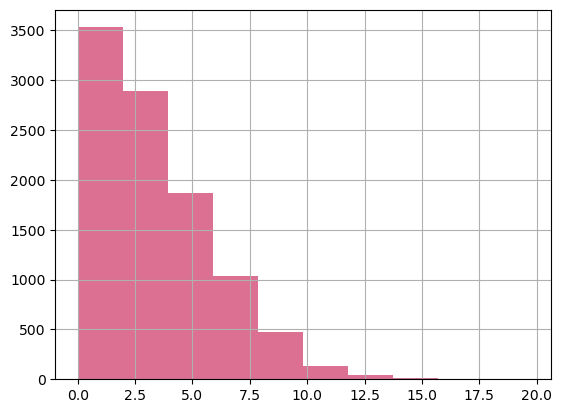

In [66]:
pd.Series(test_statistic_list).hist(color = "palevioletred")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

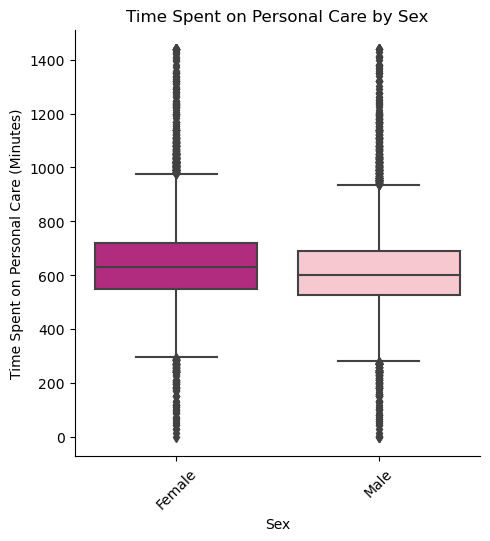

In [102]:
sns.catplot(x = "SEX", y = "ACT_PCARE", kind = "box", palette = palette1, data = time)
plt.title("Time Spent on Personal Care by Sex")
plt.xlabel("Sex")
plt.ylabel("Time Spent on Personal Care (Minutes)")
plt.xticks(rotation=45)

In [110]:
time.groupby("SEX")["ACT_PCARE"].mean()

SEX
Female    639.483360
Male      613.623641
Name: ACT_PCARE, dtype: float64

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

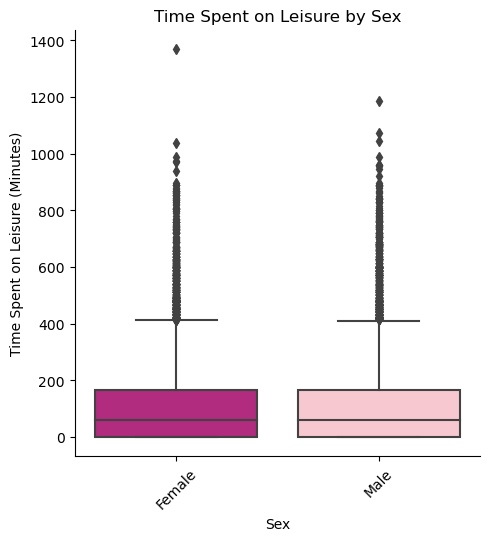

In [106]:
time["leisure"] = time["ACT_INHOME"] + time["ACT_OUTHOME"]

sns.catplot(x = "SEX", y = "leisure", kind = "box", palette = palette1, data = time)
plt.title("Time Spent on Leisure by Sex")
plt.xlabel("Sex")
plt.ylabel("Time Spent on Leisure (Minutes)")
plt.xticks(rotation=45)

In [108]:
time.groupby("SEX")["leisure"].mean()

SEX
Female    107.879773
Male      109.694737
Name: leisure, dtype: float64